# Angular Pair Counting

In this notebook, we explore the functionality of the ``AngularPairCount`` algorithm, which computes the number of pairs in angular separation bins for survey-like input data, assumed to be angular sky coordinates (i.e., right ascension and declination). 

**Note**

The data used in this notebook is not realistic -- rather, we choose the simplicity of generating mock data to help users get up and running quickly. Although the end results are not cosmologically interesting, we use the mock data to help illustrate the various steps necessary to use the ``AngularPairCount`` algorithm properly.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from nbodykit.lab import *
from nbodykit import setup_logging, style

import matplotlib.pyplot as plt
plt.style.use(style.notebook)

In [3]:
setup_logging()

## Initalizing Mock Data

In this notebook, we construct our fake "data" catalog simply by generating 10,000 objects that have uniformly distributed right ascension and declination values within a region of the sky.

In [4]:
NDATA = 10000

# randomly distributed RA/DEC on the sky
data = RandomCatalog(NDATA, seed=42)
data['RA']  = data.rng.uniform(low=110, high=260)
data['DEC'] = data.rng.uniform(low=-3.6, high=60)

## Adding Weights


The ``AngularPairCount`` algorithm also supports computing weighted pair counts. The total weight for a pair of objects is the product of the individual weights. Users can specify the name of column they would like to treat as a weight by passing the ``weight`` keyword to the algorithm constructor. 

Here, we choose randomly distributed weights between 0 and 1.

In [5]:
data['Weight'] = numpy.random.random(size=len(data))

## Auto-correlation Pair Counts

To compute the pair counts, we simply specify the edges of the angular separation bins (in degrees), as well as the names of the columns holding the sky coordinates and weight values.

In [6]:
# the angular bin edges in degrees
edges = numpy.linspace(0.1, 10., 20+1) # 20 total bins

# run the algorithm
r_auto = AngularPairCount(data, edges, ra='RA', dec='DEC', weight='Weight')

[ 000000.06 ]   0: 10-30 20:54  AngularPairCount INFO     using cpu grid decomposition: (1, 1, 1)


[ 000000.08 ]   0: 10-30 20:54  AngularPairCount INFO     correlating 10000 x 10000 objects in total


[ 000000.08 ]   0: 10-30 20:54  AngularPairCount INFO     correlating A x B = 10000 x 10000 objects (median) per rank


[ 000000.08 ]   0: 10-30 20:54  AngularPairCount INFO     min A load per rank = 10000


[ 000000.08 ]   0: 10-30 20:54  AngularPairCount INFO     max A load per rank = 10000


[ 000000.08 ]   0: 10-30 20:54  AngularPairCount INFO     (even distribution would result in 10000 x 10000)


[ 000000.08 ]   0: 10-30 20:54  AngularPairCount INFO     calling function 'Corrfunc.mocks.DDtheta_mocks.DDtheta_mocks'


[ 000000.38 ]   0: 10-30 20:54  AngularPairCount INFO     10% done


[ 000000.70 ]   0: 10-30 20:54  AngularPairCount INFO     20% done


[ 000000.98 ]   0: 10-30 20:54  AngularPairCount INFO     30% done


[ 000001.26 ]   0: 10-30 20:54  AngularPairCount INFO     40% done


[ 000001.58 ]   0: 10-30 20:54  AngularPairCount INFO     50% done


[ 000001.94 ]   0: 10-30 20:54  AngularPairCount INFO     60% done


[ 000002.22 ]   0: 10-30 20:54  AngularPairCount INFO     70% done


[ 000002.52 ]   0: 10-30 20:54  AngularPairCount INFO     80% done


[ 000002.83 ]   0: 10-30 20:54  AngularPairCount INFO     90% done


[ 000003.13 ]   0: 10-30 20:54  AngularPairCount INFO     100% done


The measured paircounts are stored in the ``result`` attribute. The number of pairs in a given angular bin is stored as the ``npairs`` field. Below, we plot the number of pairs $DD(\theta)$ as a function of angular separation.

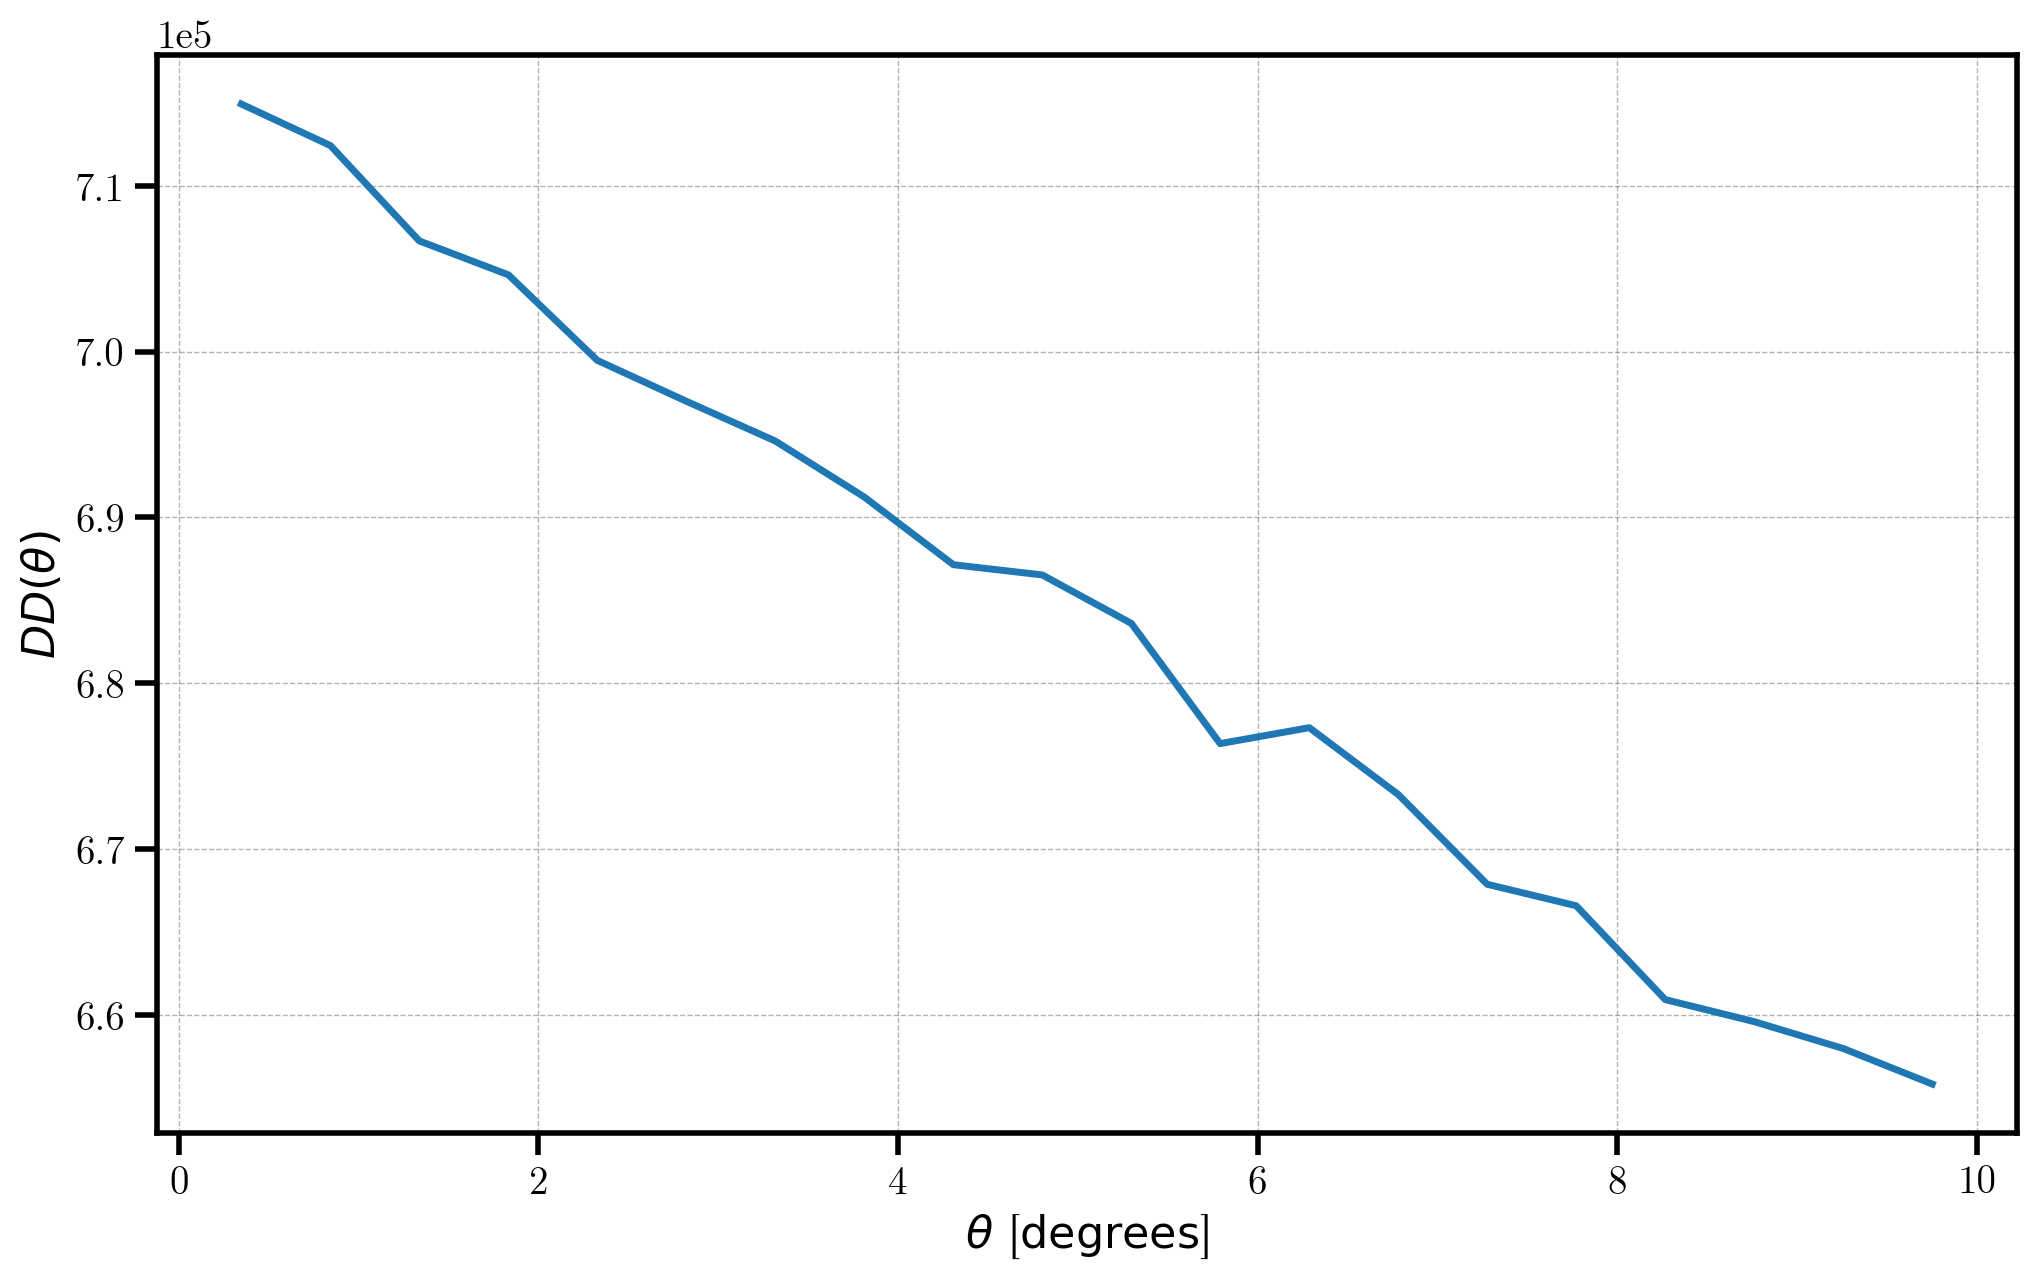

In [7]:
pc = r_auto.result
plt.plot(pc['theta'], pc['npairs'])

# format the axes
plt.xlabel(r"$\theta$ [$\mathrm{degrees}$]")
plt.ylabel(r"$DD(\theta)$")

The total weight for a given pair is the product of their individual weights, and the average total weight is computed in each angular bin. This value is stored in the ``weightavg`` field of the ``result`` attribute. Below, we plot the average weight as a function of angular separation. 

(0, 1.0)

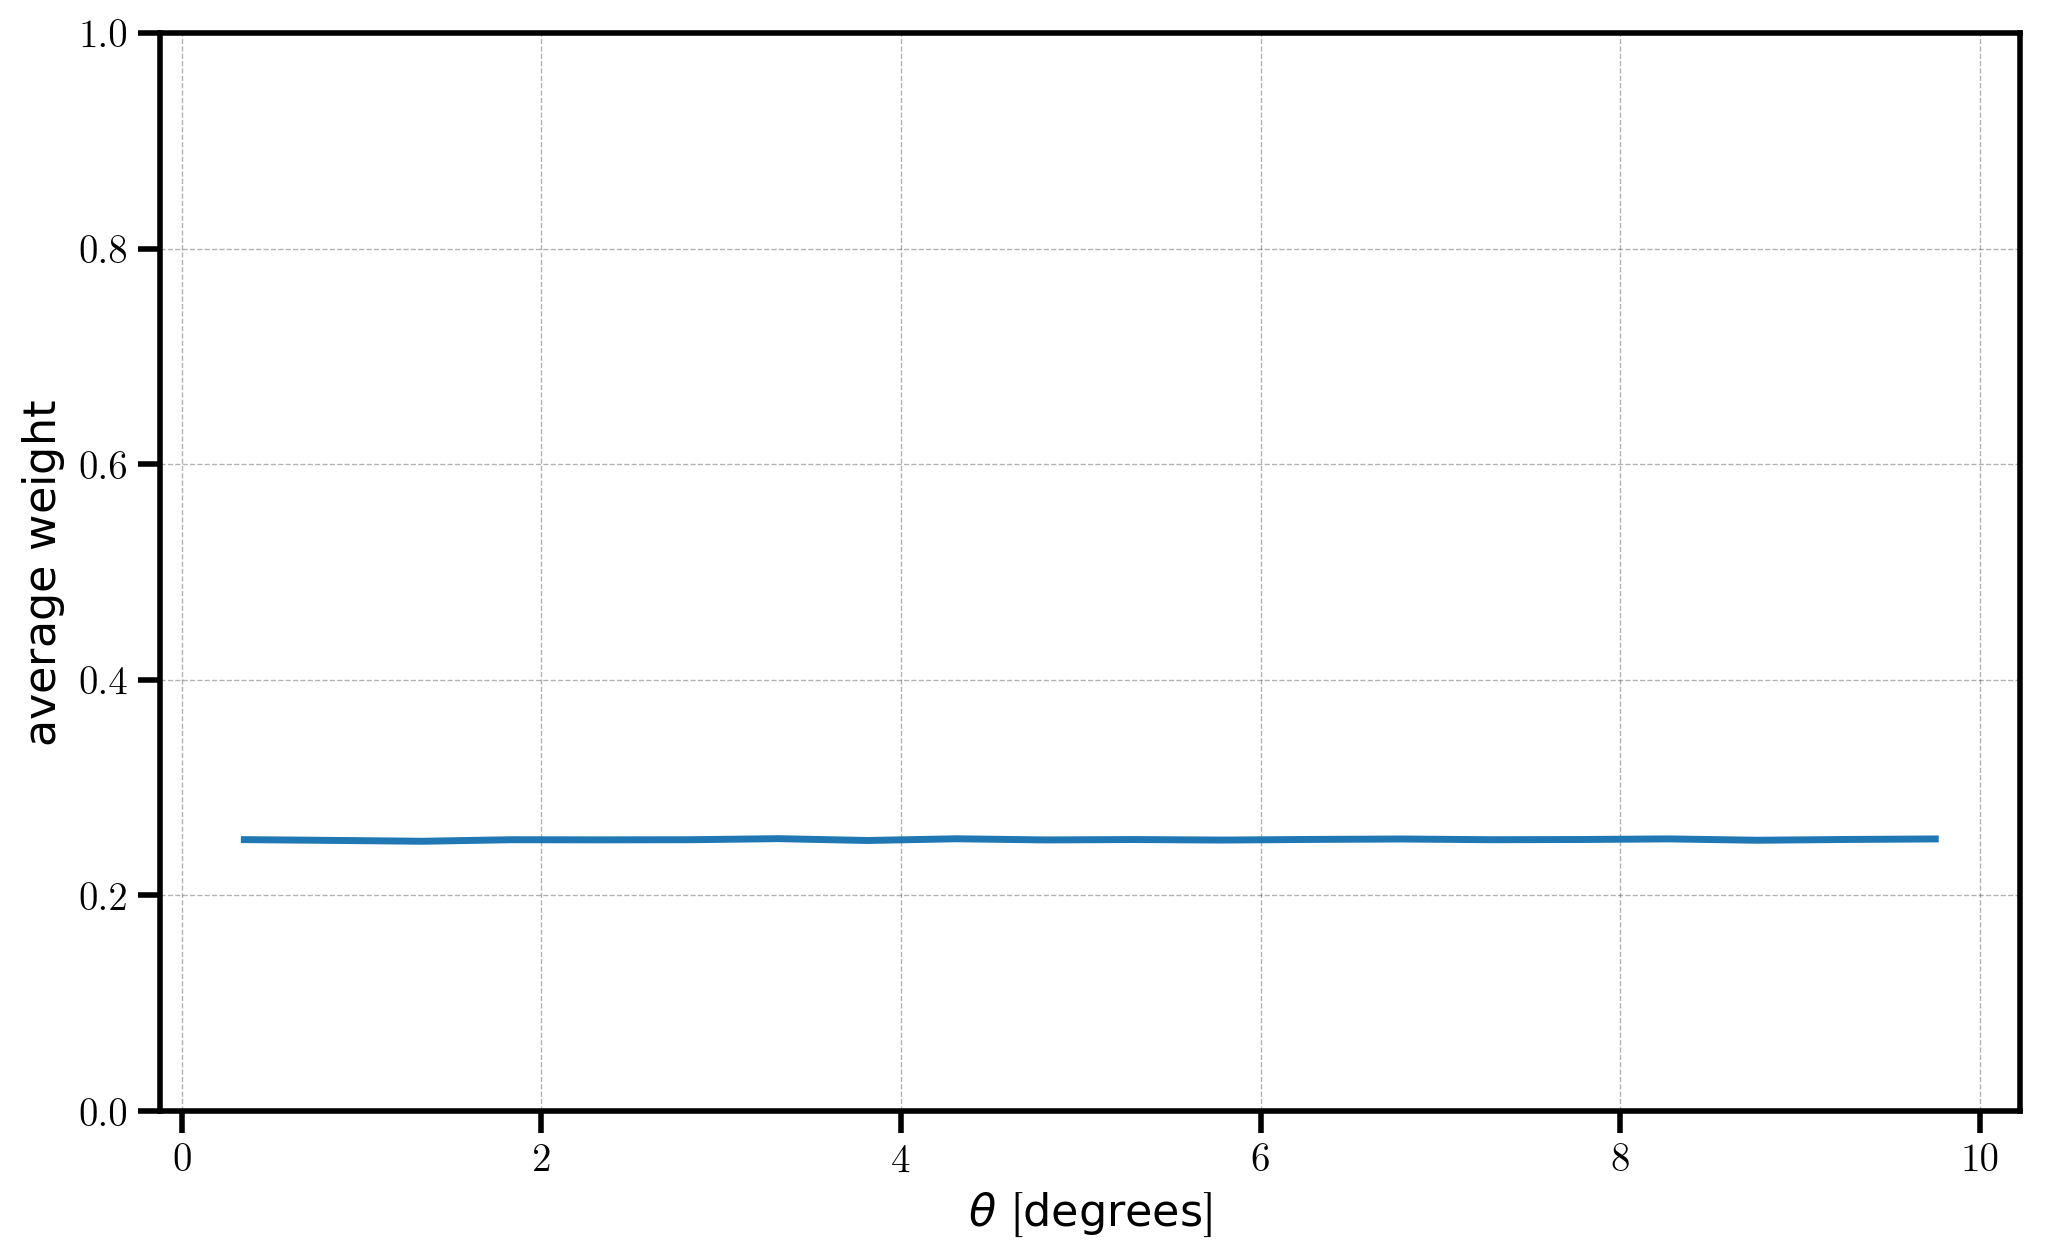

In [8]:
plt.plot(r_auto.result['theta'], r_auto.result['weightavg'])

# format the axes
plt.xlabel(r"$\theta$ [$\mathrm{degrees}$]")
plt.ylabel(r"$\mathrm{average \ weight}$")
plt.ylim(0, 1.0)

Here, we chose to weight our objects with random values ranging from 0 to 1. Thus, on average, the expectation value of the square of those weights will be 0.25, which we see reproduced in the figure above. 

## Cross-correlation Pair Counts

We can also compute the cross-correlation of pair counts between two sources. Below, we initialize a second randomly distributed catalog, and compute the pair counts between the two catalogs.

In [9]:
# randomly distributed RA/DEC on the sky
data2 = RandomCatalog(NDATA, seed=84)
data2['RA']  = data2.rng.uniform(low=110, high=260, size=len(data2))
data2['DEC'] = data2.rng.uniform(low=-3.6, high=60., size=len(data2))
data2['Weight'] = numpy.random.random(size=len(data2))

In [10]:
# compute the cross correlation pair counts
r_cross = AngularPairCount(data, edges, ra='RA', dec='DEC', weight='Weight', second=data2)

[ 000006.07 ]   0: 10-30 20:54  AngularPairCount INFO     using cpu grid decomposition: (1, 1, 1)


[ 000006.12 ]   0: 10-30 20:54  AngularPairCount INFO     correlating 10000 x 10000 objects in total


[ 000006.12 ]   0: 10-30 20:54  AngularPairCount INFO     correlating A x B = 10000 x 10000 objects (median) per rank


[ 000006.12 ]   0: 10-30 20:54  AngularPairCount INFO     min A load per rank = 10000


[ 000006.13 ]   0: 10-30 20:54  AngularPairCount INFO     max A load per rank = 10000


[ 000006.13 ]   0: 10-30 20:54  AngularPairCount INFO     (even distribution would result in 10000 x 10000)


[ 000006.14 ]   0: 10-30 20:54  AngularPairCount INFO     calling function 'Corrfunc.mocks.DDtheta_mocks.DDtheta_mocks'


[ 000006.44 ]   0: 10-30 20:54  AngularPairCount INFO     10% done


[ 000006.72 ]   0: 10-30 20:54  AngularPairCount INFO     20% done


[ 000007.00 ]   0: 10-30 20:54  AngularPairCount INFO     30% done


[ 000007.29 ]   0: 10-30 20:54  AngularPairCount INFO     40% done


[ 000007.59 ]   0: 10-30 20:54  AngularPairCount INFO     50% done


[ 000007.88 ]   0: 10-30 20:54  AngularPairCount INFO     60% done


[ 000008.16 ]   0: 10-30 20:54  AngularPairCount INFO     70% done


[ 000008.45 ]   0: 10-30 20:54  AngularPairCount INFO     80% done


[ 000008.74 ]   0: 10-30 20:54  AngularPairCount INFO     90% done


[ 000009.03 ]   0: 10-30 20:54  AngularPairCount INFO     100% done


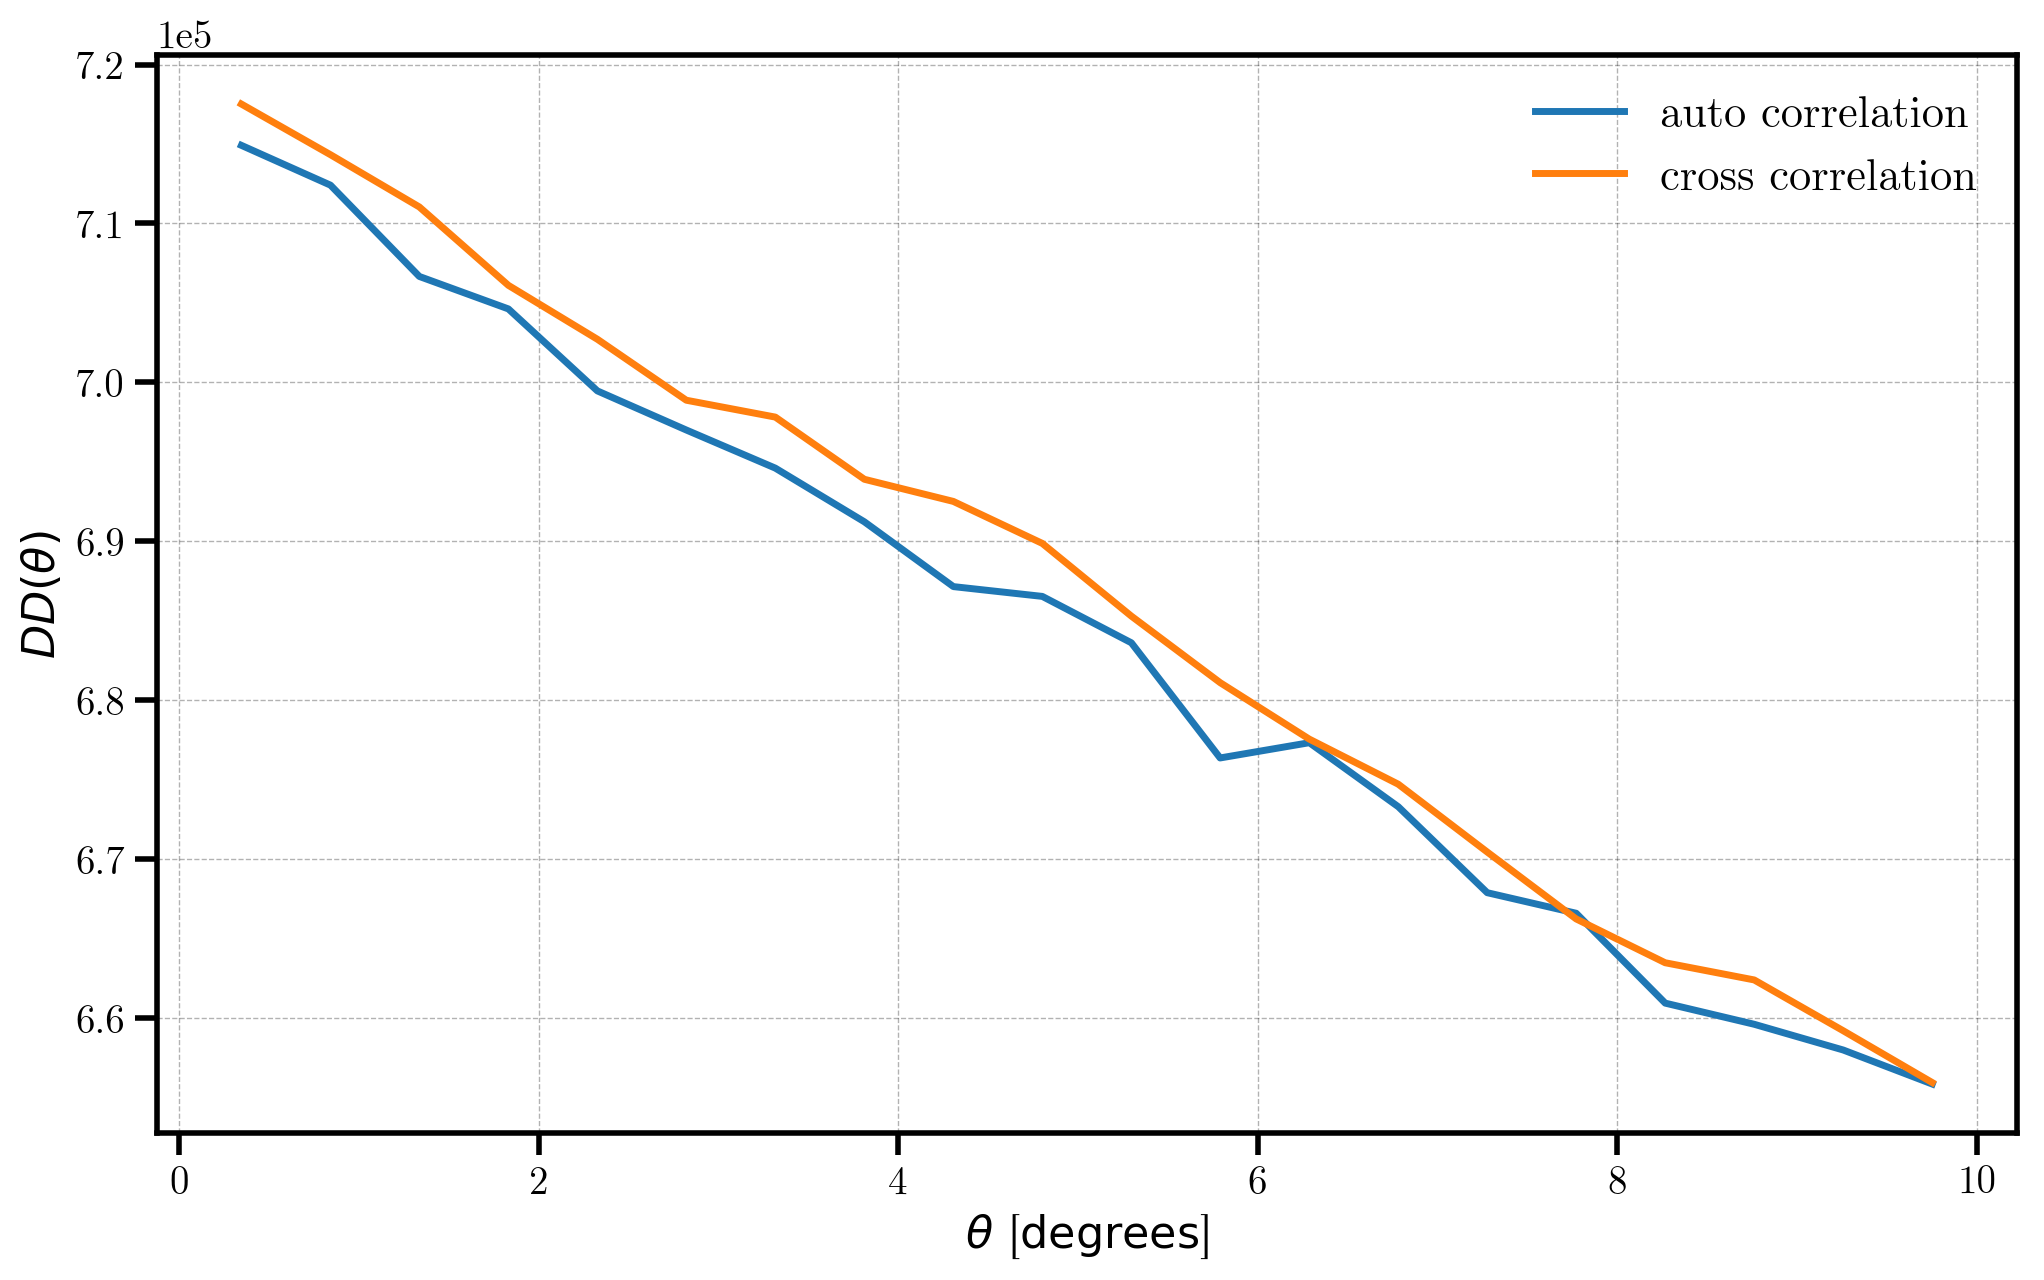

In [11]:
# plot the auto and cross pair counts
pc_auto = r_auto.result
pc_cross = r_cross.result
plt.plot(pc_auto['theta'], pc_auto['npairs'], label='auto correlation')
plt.plot(pc_cross['theta'], pc_cross['npairs'], label='cross correlation')

# format the axes
plt.legend(loc=0)
plt.xlabel(r"$\theta$ [$\mathrm{degrees}$]")
plt.ylabel(r"$DD(\theta)$")